In [1]:
from utils import *
import pandas as pd
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Overview of the immigration data

## preprocess data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_all_immigrants = pd.read_excel(file_path, sheet_name='Table 2', skiprows=4, header=1)
df_all_immigrants.set_index('Region and country of last residence1', inplace=True)
df_all_immigrants.dropna(how='all', inplace=True)
df_all_immigrants.index = df_all_immigrants.index.map(lambda x: ''.join(filter(str.isalpha, str(x))))
df_all_immigrants.index = df_all_immigrants.index.str.replace(' ', '').str.replace(',', '')

# Print the updated index
print(type(df_all_immigrants.index))
print(df_all_immigrants.head())
print(df_all_immigrants.tail())

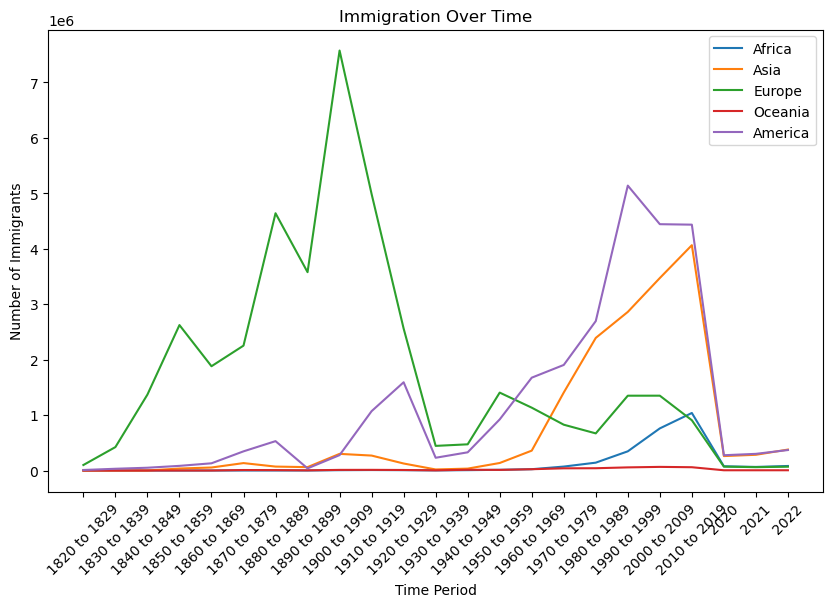

In [15]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'America']
plot_immigration_over_time(df_all_immigrants, continents)

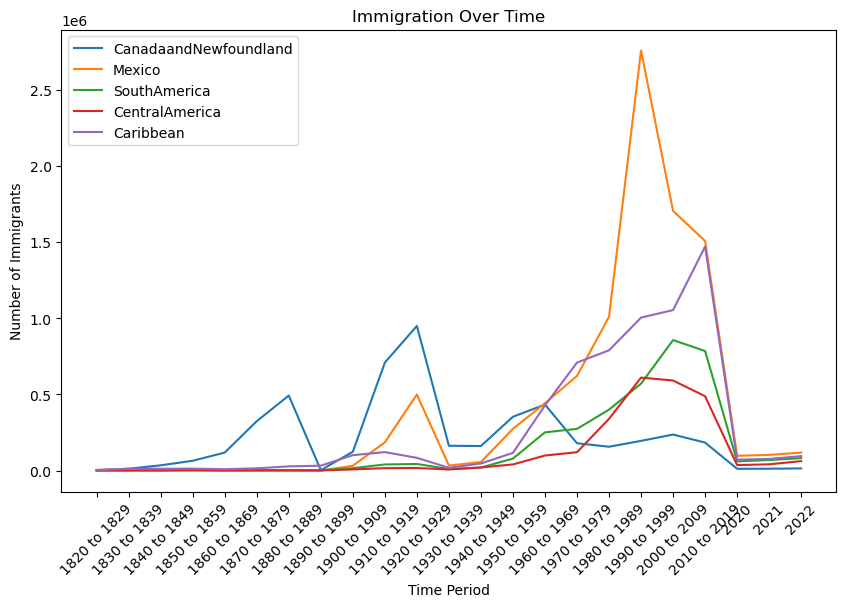

In [16]:
America = ['CanadaandNewfoundland', 'Mexico', 'SouthAmerica', 'CentralAmerica', 'Caribbean']
plot_immigration_over_time(df_all_immigrants, America)

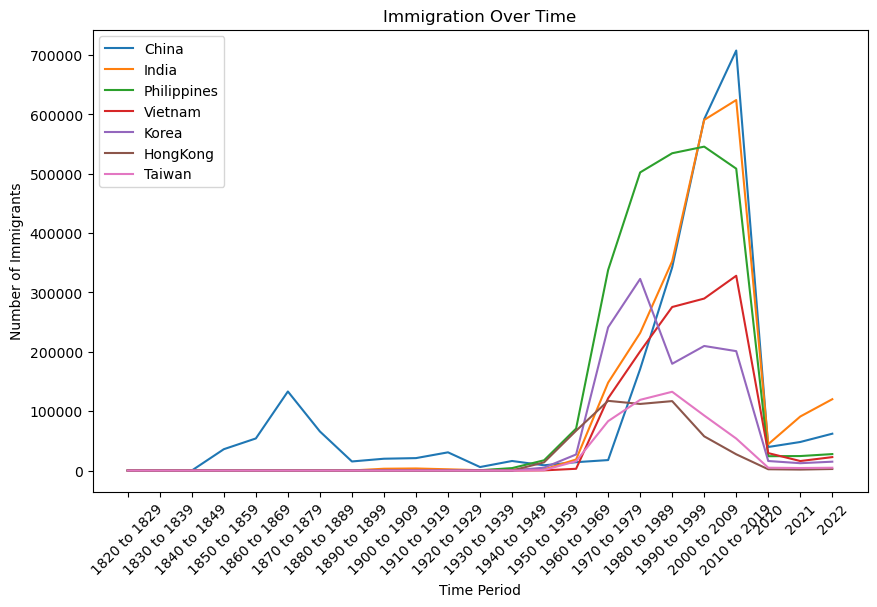

In [17]:
Asia = ['China', 'India', 'Philippines', 'Vietnam', 'Korea', 'HongKong', 'Taiwan']
plot_immigration_over_time(df_all_immigrants, Asia)

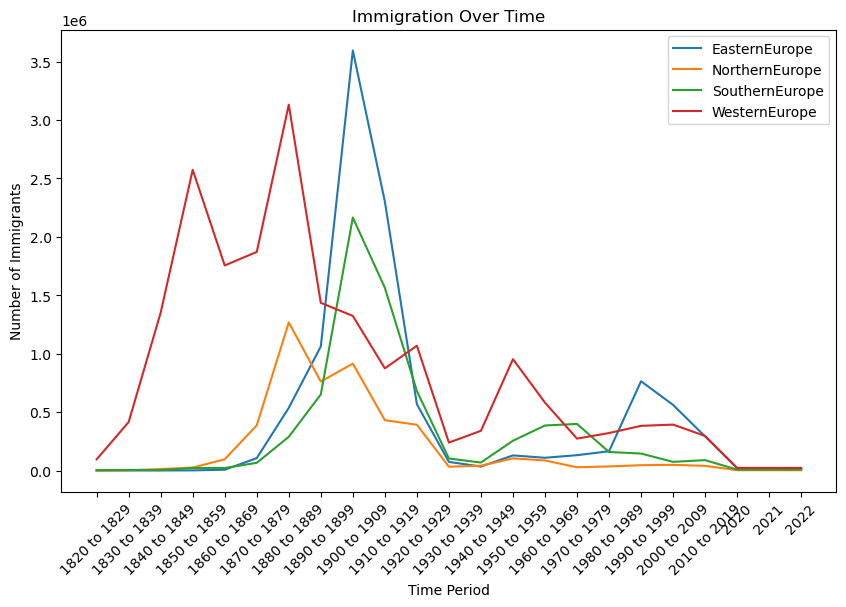

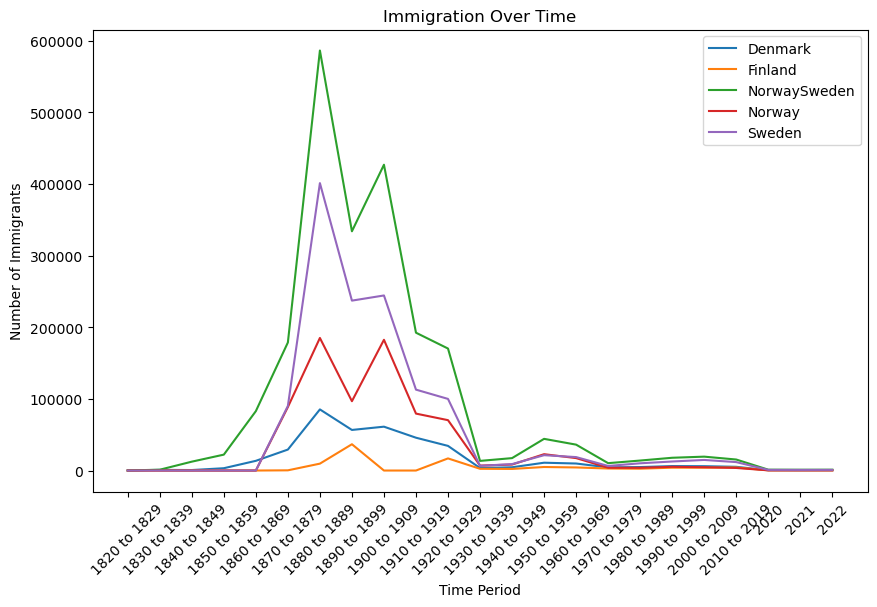

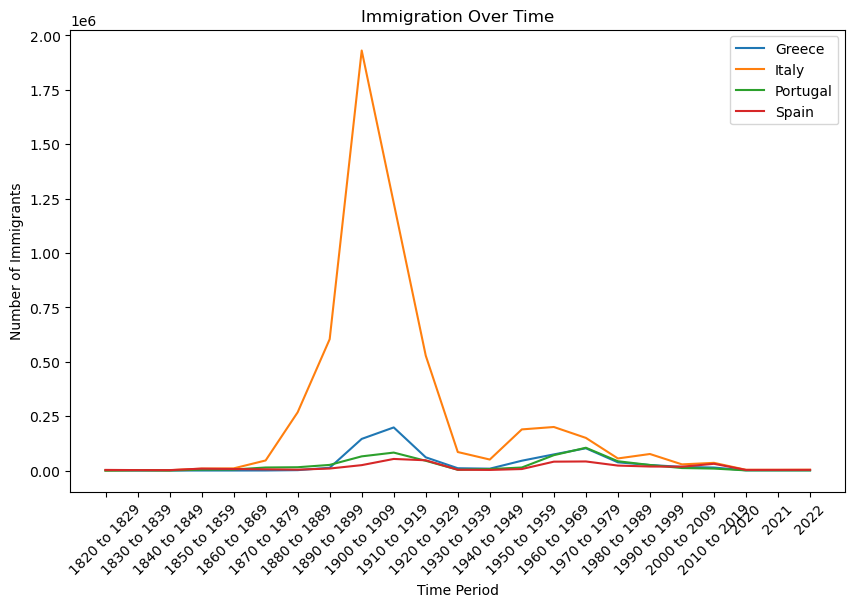

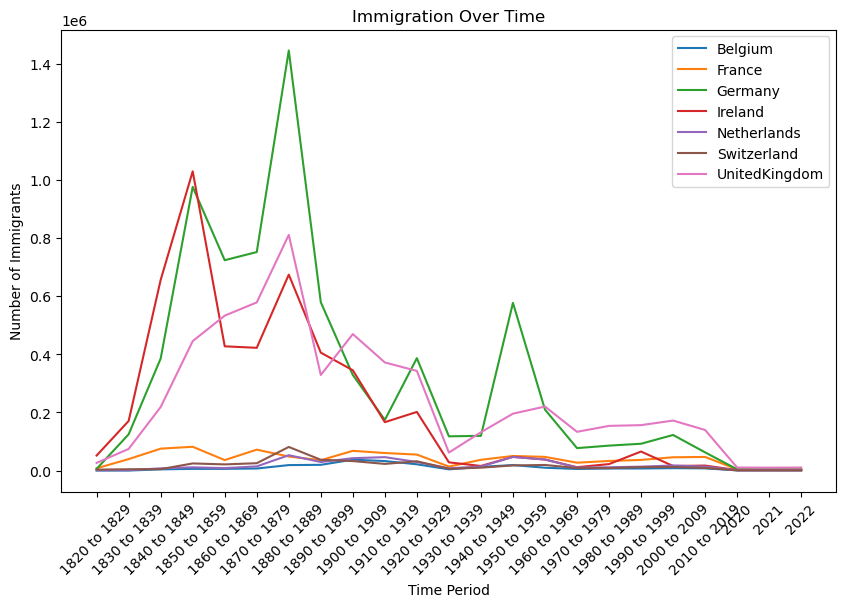

In [20]:
EasternEurope = ["AustriaHungary", "Bulgaria", "Czechoslovakia", "Poland", "Romania", "Russia", "Yugoslavia"]
df_all_immigrants.loc["EasternEurope"] = df_all_immigrants.loc[EasternEurope].sum()
NorthernEurope = ["Denmark", "Finland", "NorwaySweden", "Norway", "Sweden"]
df_all_immigrants.loc["NorthernEurope"] = df_all_immigrants.loc[NorthernEurope].sum()
SouthernEurope = ["Greece", "Italy", "Portugal", "Spain"]
df_all_immigrants.loc["SouthernEurope"] = df_all_immigrants.loc[SouthernEurope].sum()
WesternEurope = ["Belgium", "France", "Germany", "Ireland", "Netherlands", "Switzerland", "UnitedKingdom"]
df_all_immigrants.loc["WesternEurope"] = df_all_immigrants.loc[WesternEurope].sum()
all_Europe = ["EasternEurope", "NorthernEurope", "SouthernEurope", "WesternEurope"]
plot_immigration_over_time(df_all_immigrants, all_Europe)
plot_immigration_over_time(df_all_immigrants, NorthernEurope)
plot_immigration_over_time(df_all_immigrants, SouthernEurope)
plot_immigration_over_time(df_all_immigrants, WesternEurope)

# Green card type

## Overview by year

In [2]:
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_type = pd.read_excel(file_path, sheet_name='Table 6', skiprows=4, header=1)
df_type.set_index('Type and class of admission', inplace=True)
df_type.dropna(how='all', inplace=True)
# Print the updated index

print(df_type.tail())
print(df_type.index)

                                                      2013     2014    2015  \
Type and class of admission                                                   
Certain Iraqis and Afghans employed by U.S. Gov...  2188.0  11868.0  7021.0   
Cancellation of removal                                0.0      0.0     0.0   
Victims of human trafficking                           0.0      0.0     0.0   
Victims of crimes and their immediate relatives       44.0     50.0    26.0   
Other                                                411.0    534.0   521.0   

                                                       2016     2017     2018  \
Type and class of admission                                                     
Certain Iraqis and Afghans employed by U.S. Gov...  12135.0  19143.0  10265.0   
Cancellation of removal                                 0.0      0.0      0.0   
Victims of human trafficking                            0.0      0.0      0.0   
Victims of crimes and their immediate rel

## Overview by region (fiscal 2022)

In [3]:
df_type_region = pd.read_excel(file_path, sheet_name='Table 10d', skiprows=4, header=1)
df_type_region.set_index('Region and country of birth', inplace=True)
df_type_region.dropna(how='all', inplace=True)
# Print the updated index

print(df_type_region.tail())
print(df_type_region.index)

                              Total Immediate relatives of U.S. citizens  \
Region and country of birth                                                
Yemen                        5648.0                                 2585   
Zambia                        365.0                                  203   
Zimbabwe                     1433.0                                  334   
All other countries1           76.0                                   40   
Unknown                      1392.0                                  620   

                            Family-sponsored preferences  \
Region and country of birth                                
Yemen                                               2093   
Zambia                                                32   
Zimbabwe                                              69   
All other countries1                                  10   
Unknown                                              482   

                            Employment-based p

In [4]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "Unknown"]

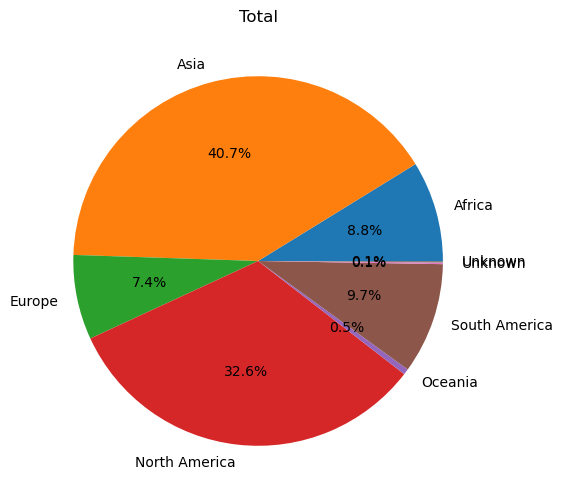

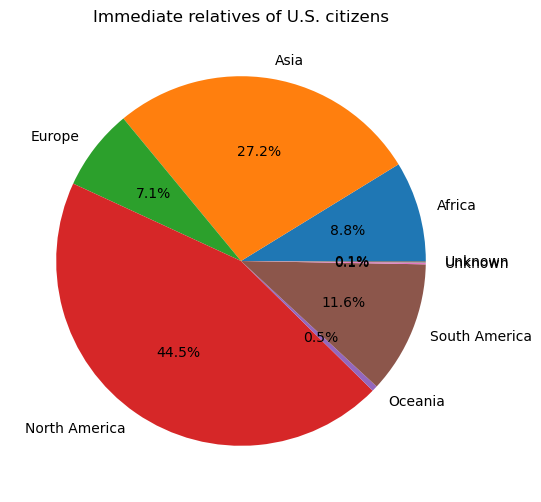

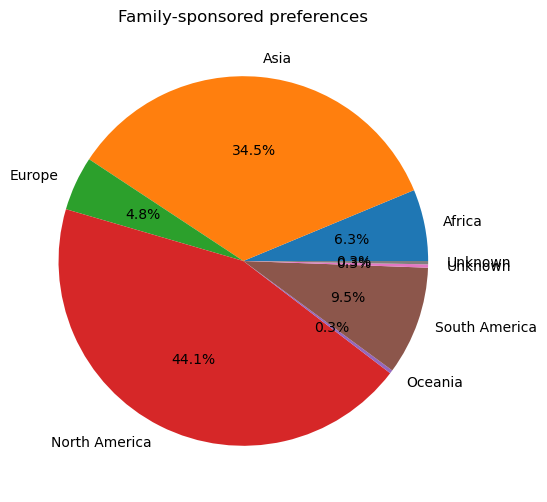

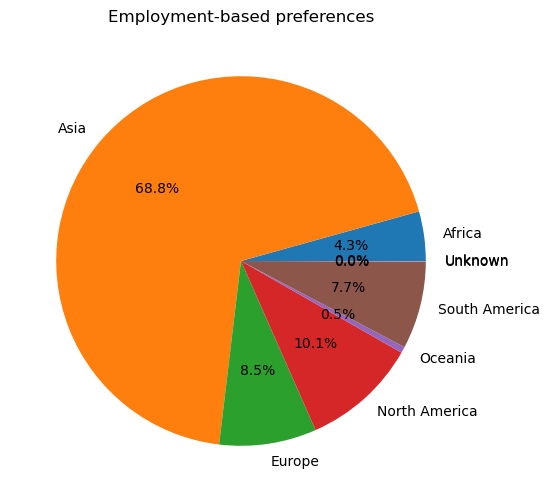

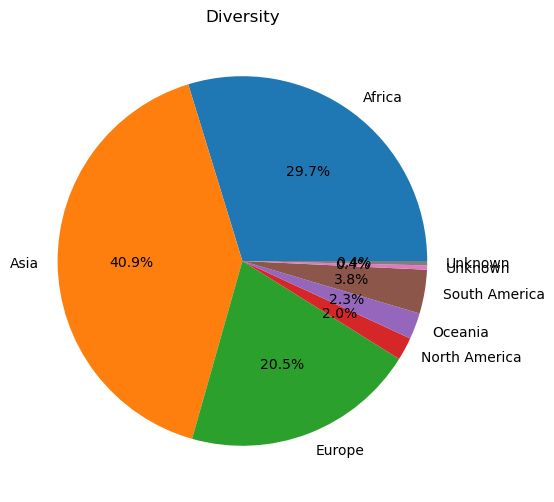

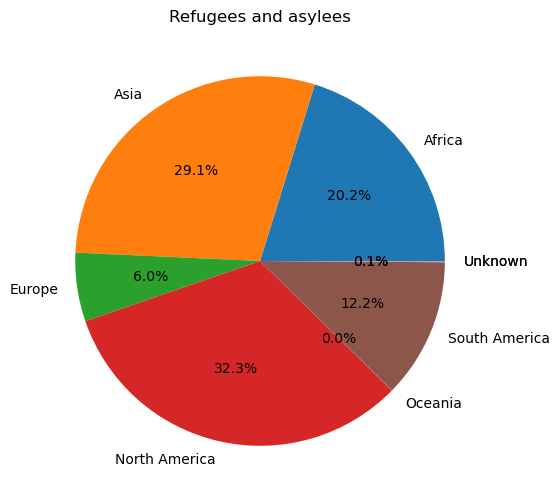

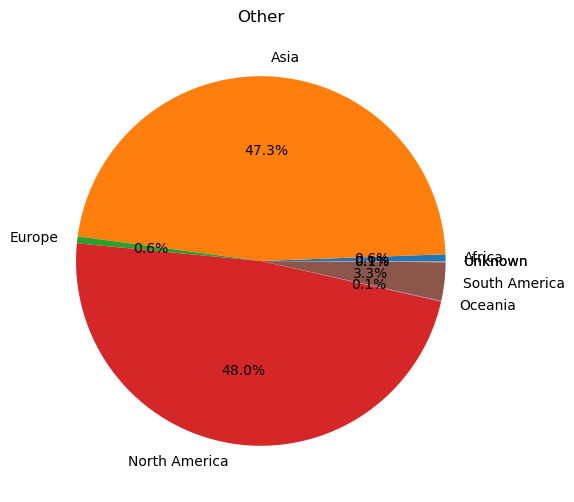

In [5]:
plot_percentage_pie(df_type_region, continents, 'Total')
plot_percentage_pie(df_type_region, continents, "Immediate relatives of U.S. citizens")
plot_percentage_pie(df_type_region, continents, "Family-sponsored preferences")
plot_percentage_pie(df_type_region, continents, "Employment-based preferences")
plot_percentage_pie(df_type_region, continents, "Diversity")
plot_percentage_pie(df_type_region, continents, "Refugees and asylees")
plot_percentage_pie(df_type_region, continents, "Other")

# Receiving states

In [ ]:
df_receiving_states = pd.read_excel(file_path, sheet_name='LPRSuppTable 1d', skiprows=4, header=1)
df_receiving_states.set_index('Region and country of birth', inplace=True)
df_receiving_states.dropna(how='all', inplace=True)
df_receiving_states.replace('D', np.nan, inplace=True)

print(df_receiving_states.head())
print(df_receiving_states.tail())

In [ ]:
plot_states_bar(df_receiving_states, 'Africa')
plot_states_bar(df_receiving_states, 'Asia')
plot_states_bar(df_receiving_states, 'Europe')


# PERM green card

## prepare data

The column names of each year's data are different. We need to preprocess them carefully.

Firstly, choose some columns that we may use later.

In [182]:
# This is valid for year 2008-2012
required_columns_1 = ["CASE_STATUS","EMPLOYER_NAME", 'Job_Info_Work_State',
                        'PW_JOB_TITLE_9089', 'PW_LEVEL_9089', 'PW_AMOUNT_9089',
                        'COUNTRY_OF_CITZENSHIP']

In [162]:
# This is valid for year 2013-2014
required_columns_2 = ["CASE_STATUS","EMPLOYER_NAME", 'Job_Info_Work_State',
                        'PW_SOC_TITLE', 'PW_LEVEL_9089', 'PW_AMOUNT_9089',
                        'COUNTRY_OF_CITIZENSHIP']

In [155]:
# This is valid for year 2015-2019
required_columns_3 = ["CASE_STATUS","EMPLOYER_NAME", 'Job_Info_Work_State',
                        'PW_SOC_TITLE', 'PW_LEVEL_9089', 'PW_AMOUNT_9089',
                        'FOREIGN_WORKER_INFO_EDUCATION', 'FOREIGN_WORKER_INFO_MAJOR',
                        'FW_INFO_BIRTH_COUNTRY']

In [156]:
# This is valid for year 2020-2023
required_columns_4 = ["CASE_STATUS","EMPLOYER_NAME", "WORKSITE_STATE",
                        "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                        "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                        "FOREIGN_WORKER_BIRTH_COUNTRY"]

Secondly, get all file paths, check if each file contains the required columns.

In [51]:
file_paths = get_all_file_paths("/Users/guoshuyi/Desktop/PERM_data")
print(file_paths)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv']


In [208]:
qualified_files_1 = get_perm_data_path(file_paths, required_columns_1)
qualified_files_2 = get_perm_data_path(file_paths, required_columns_2)
qualified_files_2 = qualified_files_2[0:2]
qualified_files_3 = get_perm_data_path(file_paths, required_columns_3)
qualified_files_4 = get_perm_data_path(file_paths, required_columns_4)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PE

In [209]:
print(qualified_files_1)
print(qualified_files_2)
print(qualified_files_3)
print(qualified_files_4)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv']


In [212]:
for file in qualified_files_1:
    df_1 = read_perm_data(qualified_files_1, required_columns_1)
    df_1["birth country"] = None
    df_1["major"] = None
    df_1["education"] = None
    df_1 = df_1.rename(columns={"job info work state": "worksite state",
                                "pw job title 9089": "job title",
                                "pw level 9089": "job level",
                                "pw amount 9089": "wage",
                                "country of citzenship": "country of citizenship"})
print(df_1.head())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memo

  case status                      employer name worksite state     job title  \
0      DENIED           DC GRILL INC T/A DC CAFE             DC  UNCLASSIFIED   
1      DENIED    NAG INC DBA ENGINEERING SYSTEMS             CA  UNCLASSIFIED   
2   CERTIFIED            UNION ENTERPRISES, INC.             MD  UNCLASSIFIED   
3      DENIED           CIVIL CONSTRUCTION, LLC.             MD  UNCLASSIFIED   
4      DENIED  AMSERA GENERAL BEAUTY MERCHANDISE             NJ  UNCLASSIFIED   

  job level  wage country of citizenship  Year birth country major education  
0       NaN   NaN             MAURITANIA  2008          None  None      None  
1       NaN   NaN               PAKISTAN  2008          None  None      None  
2       NaN   NaN            PHILIPPINES  2008          None  None      None  
3       NaN   NaN               PORTUGAL  2008          None  None      None  
4       NaN   NaN           SIERRA LEONE  2008          None  None      None  


/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [214]:
for file in qualified_files_2:
    df_2 = read_perm_data(qualified_files_2, required_columns_2)
    df_2["birth country"] = None
    df_2["major"] = None
    df_2["education"] = None
    df_2 = df_2.rename(columns={"job info work state": "worksite state",
                                "pw soc title": "job title",
                                "pw job title 9089": "job title",
                                "pw level 9089": "job level",
                                "pw amount 9089": "wage",
                                "country of citzenship": "country of citizenship"})
print(df_2.head())

         case status                             employer name worksite state  \
0          Certified           ARCHITECTURAL STONE ACCENTS INC        GEORGIA   
1  Certified-Expired  BY MARVIC TRANSMISSION AUTO REPAIR, CORP       NEW YORK   
2          Certified                  STMICROELECTRONICS, INC.     CALIFORNIA   
3          Certified                  STMICROELECTRONICS, INC.          TEXAS   
4  Certified-Expired                  STMICROELECTRONICS, INC.        GEORGIA   

                                           job title  job level       wage  \
0  First-Line Supervisors/Managers of Production ...   Level IV      27.26   
1  Helpers--Installation, Maintenance, and Repair...   Level II      12.87   
2             Electronics Engineers, Except Computer        NaN   95498.00   
3             Electronics Engineers, Except Computer   Level IV  105685.00   
4              Software Developers, Systems Software  Level III   97427.00   

  country of citizenship  Year birth country

In [215]:
for file in qualified_files_3:
    df_3 = read_perm_data(qualified_files_3, required_columns_3)
    df_3 = df_3.rename(columns={"job info work state": "worksite state",
                                "pw soc title": "job title",
                                "pw level 9089": "job level",
                                "pw amount 9089": "wage",
                                "fw info birth country": "birth country",
                                "foreign worker info major": "major",
                                "foreign worker info education": "education"})
print(df_3.head())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,

         case status               employer name worksite state  \
0  Certified-Expired      UNION PACIFIC RAILROAD       NEBRASKA   
1  Certified-Expired          VST CONSULTING INC     NEW JERSEY   
2  Certified-Expired                 GOOGLE INC.     CALIFORNIA   
3  Certified-Expired           INTEL CORPORATION     CALIFORNIA   
4  Certified-Expired  NET ESOLUTIONS CORPORATION       VIRGINIA   

                                job title  job level       wage   education  \
0       Software Developers, Applications  Level III  76,482.00  Bachelor's   
1       Software Developers, Applications  Level III  90,459.00    Master's   
2       Software Developers, Applications   Level II  98,675.00    Master's   
3  Electronics Engineers, Except Computer        NaN  80,617.00    Master's   
4       Software Developers, Applications   Level II  87,422.00    Master's   

                                          major birth country  Year  
0                              COMPUTER SCIENCE     

In [ ]:
# This is valid for year 2020-2023
required_columns_4 = ["CASE_STATUS","EMPLOYER_NAME", "WORKSITE_STATE",
                        "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                        "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                        "FOREIGN_WORKER_BIRTH_COUNTRY"]

In [217]:
for file in qualified_files_4:
    df_4 = read_perm_data(qualified_files_4, required_columns_4)
    df_4 = df_4.rename(columns={"pw soc title": "job title",
                                "pw skill level": "job level",
                                "pw wage": "wage",
                                "foreign worker birth country": "birth country",
                                "foreign worker info major": "major",
                                "foreign worker education": "education"})
print(df_4.head())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (6,16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (5,6,16,19,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (5,6,16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (5,6,16,19,101,102,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (6,16,19,

         case status             employer name worksite state  \
0             Denied    SATURN ENTERPRISES INC       ILLINOIS   
1          Certified    SUNRAY ENTERPRISE INC.        GEORGIA   
2  Certified-Expired                FIL PARONG       MARYLAND   
3             Denied  GLENNS PLUMBING SERVICES       NEW YORK   
4          Certified   ASTIR IT SOLUTIONS, INC     NEW JERSEY   

                                   job title  job level         wage  \
0                   administrative assistant    Level I       $14.49   
1      Software Developers, Systems Software   Level IV  $117,000.00   
2        MAINTENANCE  REPAIR WORKER, GENERAL  Level III       $19.36   
3                                    PLUMBER   Level IV   $78,645.00   
4  Computer Software Engineers, Applications   Level II   $72,675.00   

     education                   major birth country  Year  
0  High School                 GENERAL        POLAND  2020  
1          NaN                     NaN         INDIA  

In [218]:
df = pd.concat([df_1, df_2, df_3, df_4], axis=0)

In [219]:
df.to_csv("perm_data.csv", index=False)

In [6]:
all_perm = pd.read_csv("perm_data.csv")

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_95524/1556390009.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_perm = pd.read_csv("perm_data.csv")


In [7]:
all_perm["case status"] = all_perm["case status"].replace("CERTIFIED", "Certified")
all_perm["case status"] = all_perm["case status"].replace("DENIED", "Denied")
all_perm["case status"] = all_perm["case status"].replace("WITHDRAWN", "Withdrawn")
all_perm["case status"] = all_perm["case status"].replace("CERTIFIED-EXPIRED", "Certified-Expired")

<Axes: ylabel='case status'>

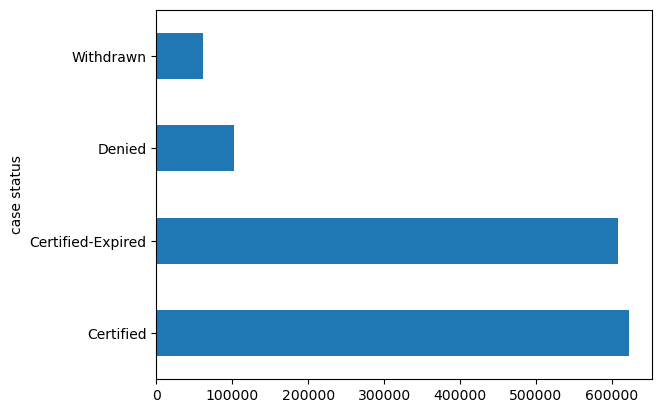

In [9]:
all_perm.groupby("case status").size().plot(kind='barh')

<Axes: ylabel='job title'>

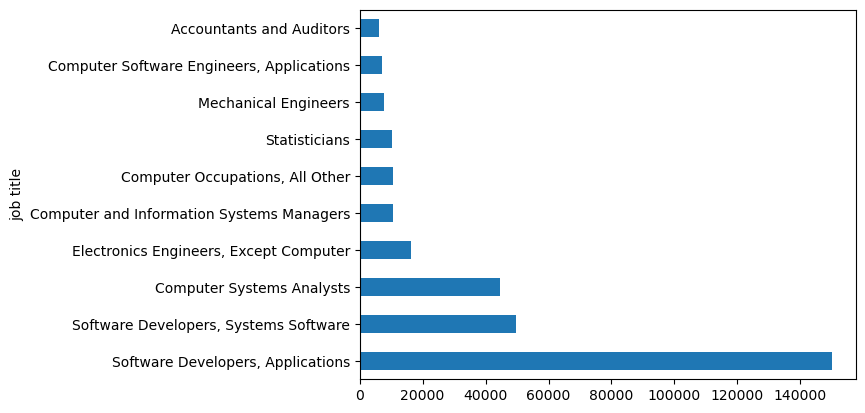

In [10]:
all_perm[all_perm["case status"] == "Certified"].groupby("job title").size().sort_values(ascending=False).head(10).plot(kind='barh')

## case status analysis

In [20]:
all_perm["case status"].unique()

array(['Denied', 'Certified', 'Certified-Expired', 'Withdrawn', nan],
      dtype=object)

Text(0.5, 1.0, 'Number of applications over time (case status not null)')

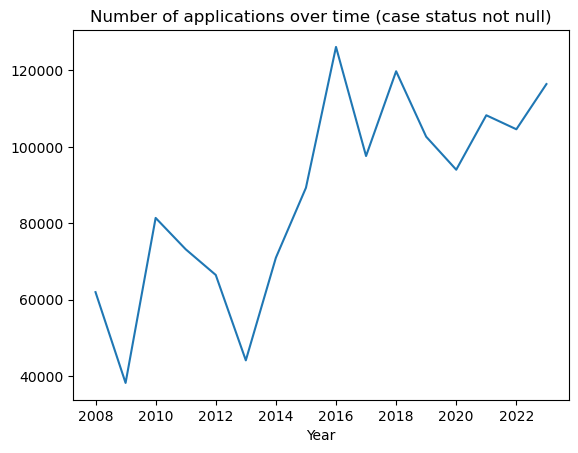

In [23]:
all_perm[all_perm["case status"].notna()].groupby("Year").size().plot(kind='line')
plt.title("Number of applications over time (case status not null)")

Text(0.5, 1.0, 'Number of Certified/Certified-Expired Cases Over Time')

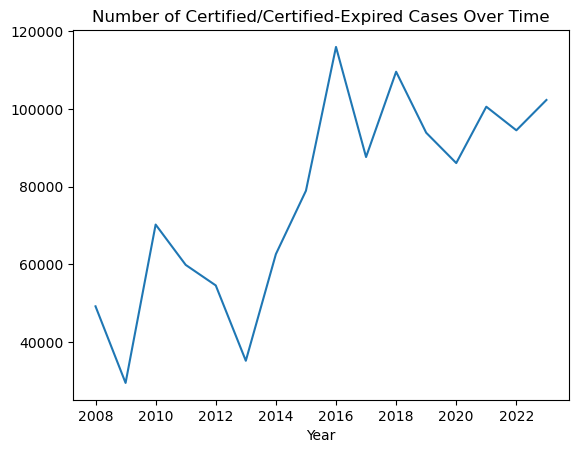

In [16]:
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line')
plt.title("Number of Certified/Certified-Expired Cases Over Time")

Text(0.5, 1.0, 'Number of Denied Cases Over Time')

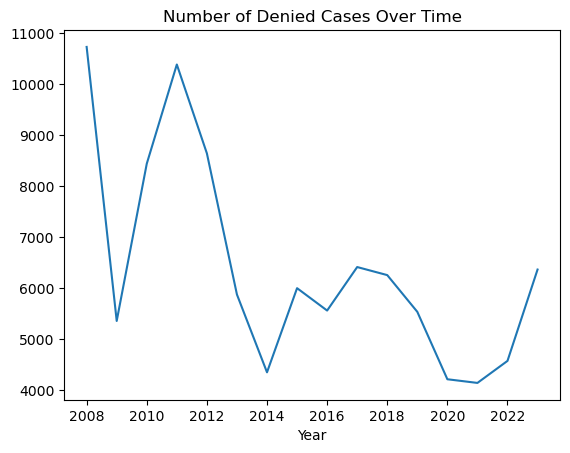

In [24]:
all_perm[all_perm["case status"] == "Denied"].groupby("Year").size().plot(kind='line')
plt.title("Number of Denied Cases Over Time")

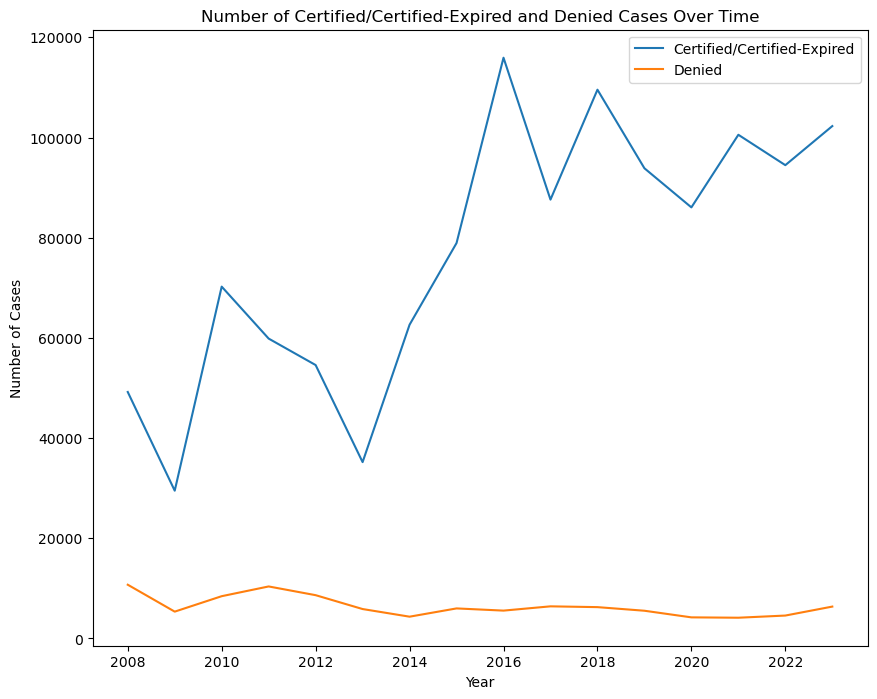

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the first line
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line', ax=ax, label="Certified/Certified-Expired")

# Plot the second line
all_perm[all_perm["case status"] == "Denied"].groupby("Year").size().plot(kind='line', ax=ax, label="Denied")

# Set the title and labels
ax.set_title("Number of Certified/Certified-Expired and Denied Cases Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cases")

# Add a legend
ax.legend()

# Show the plot
plt.show()
